In [ ]:
pip install control

 FT malha aberta=  
  5
-----
s + 5

 FT controlador=  
3
-
1

 FT malha fechada=  
  15
------
s + 20



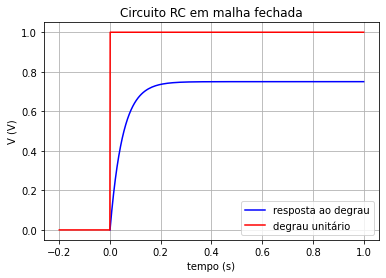

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

R = 20.0e3; C=10.0e-6; tau=R*C;
Tsim=1.;
# cria a função de transferência em malha aberta
numerador = [1/tau]; denominador = [1., 1/tau]
P_s = ctl.tf(numerador, denominador)
print(' FT malha aberta= ' ,P_s)
# cria a função de transferência do controlador
C_s=ctl.tf([3.],[1.])
print(' FT controlador= ' ,C_s)
# cria a função de transferência do sensor
H_s=ctl.tf([1.],[1.])
#Funcao de transf Malha fechada
#G1_s=(C_s*P_s)/(1+C_s*P_s*H_s)
G_s=ctl.series(C_s, P_s);
G1_s=ctl.feedback(G_s, H_s, sign=-1);
print(' FT malha fechada= ' ,G1_s)
#calcula a resposta ao degrau
T_mf, yout_mf = ctl.step_response(G1_s, Tsim)
#calcula um degrau unitário
T2=np.linspace(-0.2,Tsim,1000)
degrau=np.ones_like(T2)
degrau[T2<0]=0;
#plota os resultados
plt.plot(T_mf,yout_mf,'b-')
plt.plot(T2,degrau,'r-')
plt.ylabel('V (V)'); plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau','degrau unitário'])
plt.title('Circuito RC em malha fechada'); plt.grid()